# ANÁLISIS DE DATOS - SUPEMARKET SALES

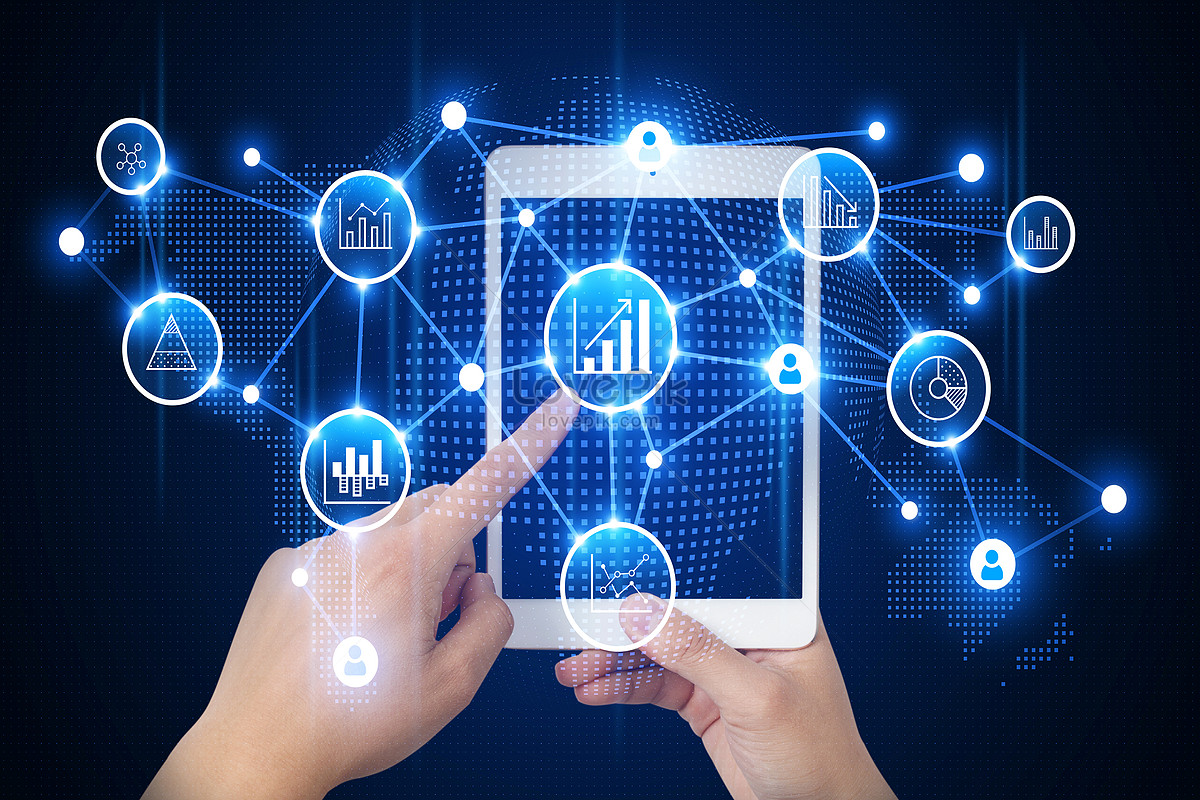 

**CONTENIDO**
 
1.Importación del dataset.   
2.Información general del dataset.  
3.Estadísticas.  
4.Gráficos.  
5.Preguntas de negocio.  
6.Fuente del dataset


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from datetime import datetime

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns  # seaborn para plotear 

# DATASET

In [2]:
#DATASET
dataset = pd.read_csv('supermarket_sales.csv', encoding = "ISO-8859-1", delimiter=',')  

#Exploramos el dataset
dataset.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [3]:
#renombrar columnas por su nombre en español

dataset= dataset.rename(columns={
    'Invoice ID': 'Id Factura',    'Branch': 'Sucursal',    'City': 'Ciudad',    'Customer type': 'Tipo de Cliente',
    'Gender': 'Género',    'Product line': 'Línea de producto',    'Unit price': 'Precio unitario',    'Quantity': 'Cantidad',
    'Tax 5%': 'Impuesto 5%',    'Total': 'Total',    'Date': 'Fecha',    'Time': 'Hora',    'Payment': 'Pago',    'cogs': 'Costo de venta',
    'gross margin percentage': 'Porcentaje Margen bruto',    'gross income': 'Ingreso bruto',    'Rating': 'Puntuación del cliente'
})

In [25]:
#pasamos a formato adecuado la columna fecha
dataset["Fecha"]=pd.to_datetime(dataset["Fecha"])
# Crear la columna 'Nombre mes' que contiene el mes de cada fecha
dataset["Mes"]=dataset['Fecha'].dt.month

# INFORMACIÓN GENERAL DEL DATASET

In [5]:
dataset.shape

(1000, 18)

**El dataset cuenta con 1000 filas y 17 columnas**

In [26]:
dataset.head()

,Id Factura,Sucursal,Ciudad,Tipo de Cliente,Género,Línea de producto,Precio unitario,Cantidad,Impuesto 5%,Total,Fecha,Hora,Pago,Costo de venta,Porcentaje Margen bruto,Ingreso bruto,Puntuación del cliente,Mes
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Id Factura               1000 non-null   object        
 1   Sucursal                 1000 non-null   object        
 2   Ciudad                   1000 non-null   object        
 3   Tipo de Cliente          1000 non-null   object        
 4   Género                   1000 non-null   object        
 5   Línea de producto        1000 non-null   object        
 6   Precio unitario          1000 non-null   float64       
 7   Cantidad                 1000 non-null   int64         
 8   Impuesto 5%              1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Fecha                    1000 non-null   datetime64[ns]
 11  Hora                     1000 non-null   object        
 12  Pago                     1000 non-n

**Se aprecia que no hay valores nulos en las columnas.**

# ESTADÍSTICAS

In [8]:
dataset.describe()

,Precio unitario,Cantidad,Impuesto 5%,Total,Costo de venta,Porcentaje Margen bruto,Ingreso bruto,Puntuación del cliente
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


**Ciudades**

In [9]:
#con el parámetro normalize obtenemos frecuencias relativas
dataset["Ciudad"].value_counts(normalize=True)

Yangon       0.340
Mandalay     0.332
Naypyitaw    0.328
Name: Ciudad, dtype: float64

**Sucursales**

In [10]:
#frecuencia relativa de sucursal
dataset["Sucursal"].value_counts(normalize=True)

A    0.340
B    0.332
C    0.328
Name: Sucursal, dtype: float64

**Tipo de cliente**

In [11]:
#frecuencia relativa de  tipo de cliente
dataset["Tipo de Cliente"].value_counts(normalize=True)

Member    0.501
Normal    0.499
Name: Tipo de Cliente, dtype: float64

**Formas de pago**

In [12]:
#frecuencia relativa de formas de pago
dataset["Pago"].value_counts(normalize=True)

Ewallet        0.345
Cash           0.344
Credit card    0.311
Name: Pago, dtype: float64

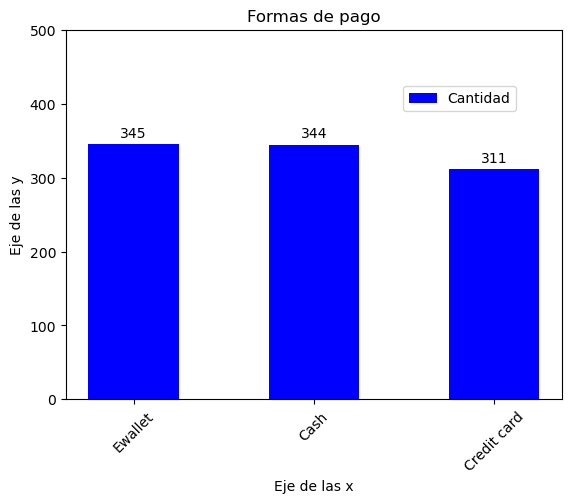

In [13]:
#vamos a crear listas para graficar con matplotlib por un lado la cuenta de cada cat y por otro las categorias
cuenta=dataset['Pago'].value_counts()
categorias = cuenta.index.tolist()
conteo = cuenta.tolist()
plt.title("Formas de pago")                      #TITULO
plt.ylabel("Eje de las y",fontsize=10)        #ETIQUETA X
plt.xlabel("Eje de las x",fontsize=10)          #ETIQUETA Y
plt.xticks( rotation=45)   #inclinacion de las etiquetas de eje x
plt.ylim(0,500) #limite para el eje y.
plt.bar(categorias,conteo, color='blue', label='Cantidad', width=0.5)

plt.legend(loc=(0.68,0.78)) #le indico donde poner la leyenda (horizontal, vertical)
# plt.grid() #adicionar una grilla
#guardo en una lista los valores del campo Pago
valores = dataset['Pago'].tolist() # Agregar los valores encima de cada barra
for i, v in enumerate(conteo):
    plt.text(i, v+10, str(v), ha='center') #el v+10 hace que la etiqueta se asigne por encima de la barra, sin solaparse
plt.show()

El método de pago más usado es la billetera electrónica, seguido por el efectivo. 

**Línea de producto**

In [14]:
#frecuencia relativa de línea de producto
dataset["Línea de producto"].value_counts(normalize=True)

Fashion accessories       0.178
Food and beverages        0.174
Electronic accessories    0.170
Sports and travel         0.166
Home and lifestyle        0.160
Health and beauty         0.152
Name: Línea de producto, dtype: float64

In [15]:
#Promedio de precio unitario agrupado según Línea de producto
dataset[["Línea de producto","Precio unitario","Total"]].groupby("Línea de producto").agg(["mean","count","sum"])

Precio unitario                       Total        \
                                  mean count       sum        mean count   
Línea de producto                                                          
Electronic accessories       53.551588   170   9103.77  319.632538   170   
Fashion accessories          57.153652   178  10173.35  305.089298   178   
Food and beverages           56.008851   174   9745.54  322.671517   174   
Health and beauty            54.854474   152   8337.88  323.643020   152   
Home and lifestyle           55.316937   160   8850.71  336.636956   160   
Sports and travel            56.993253   166   9460.88  332.065220   166   

                                    
                               sum  
Línea de producto                   
Electronic accessories  54337.5315  
Fashion accessories     54305.8950  
Food and beverages      56144.8440  
Health and beauty       49193.7390  
Home and lifestyle      53861.9130  
Sports and travel       55122.8265

La categoría de producto con precio promedio más alto fue Fashion accessories.

**sns.pairplot proporciona gráficos de dispersión(scatter plot) entre pares de variables numéricas, 
permitiendo observar la relación entre las mismas. También permite identificar patrones y tendencias
en los datos.** 

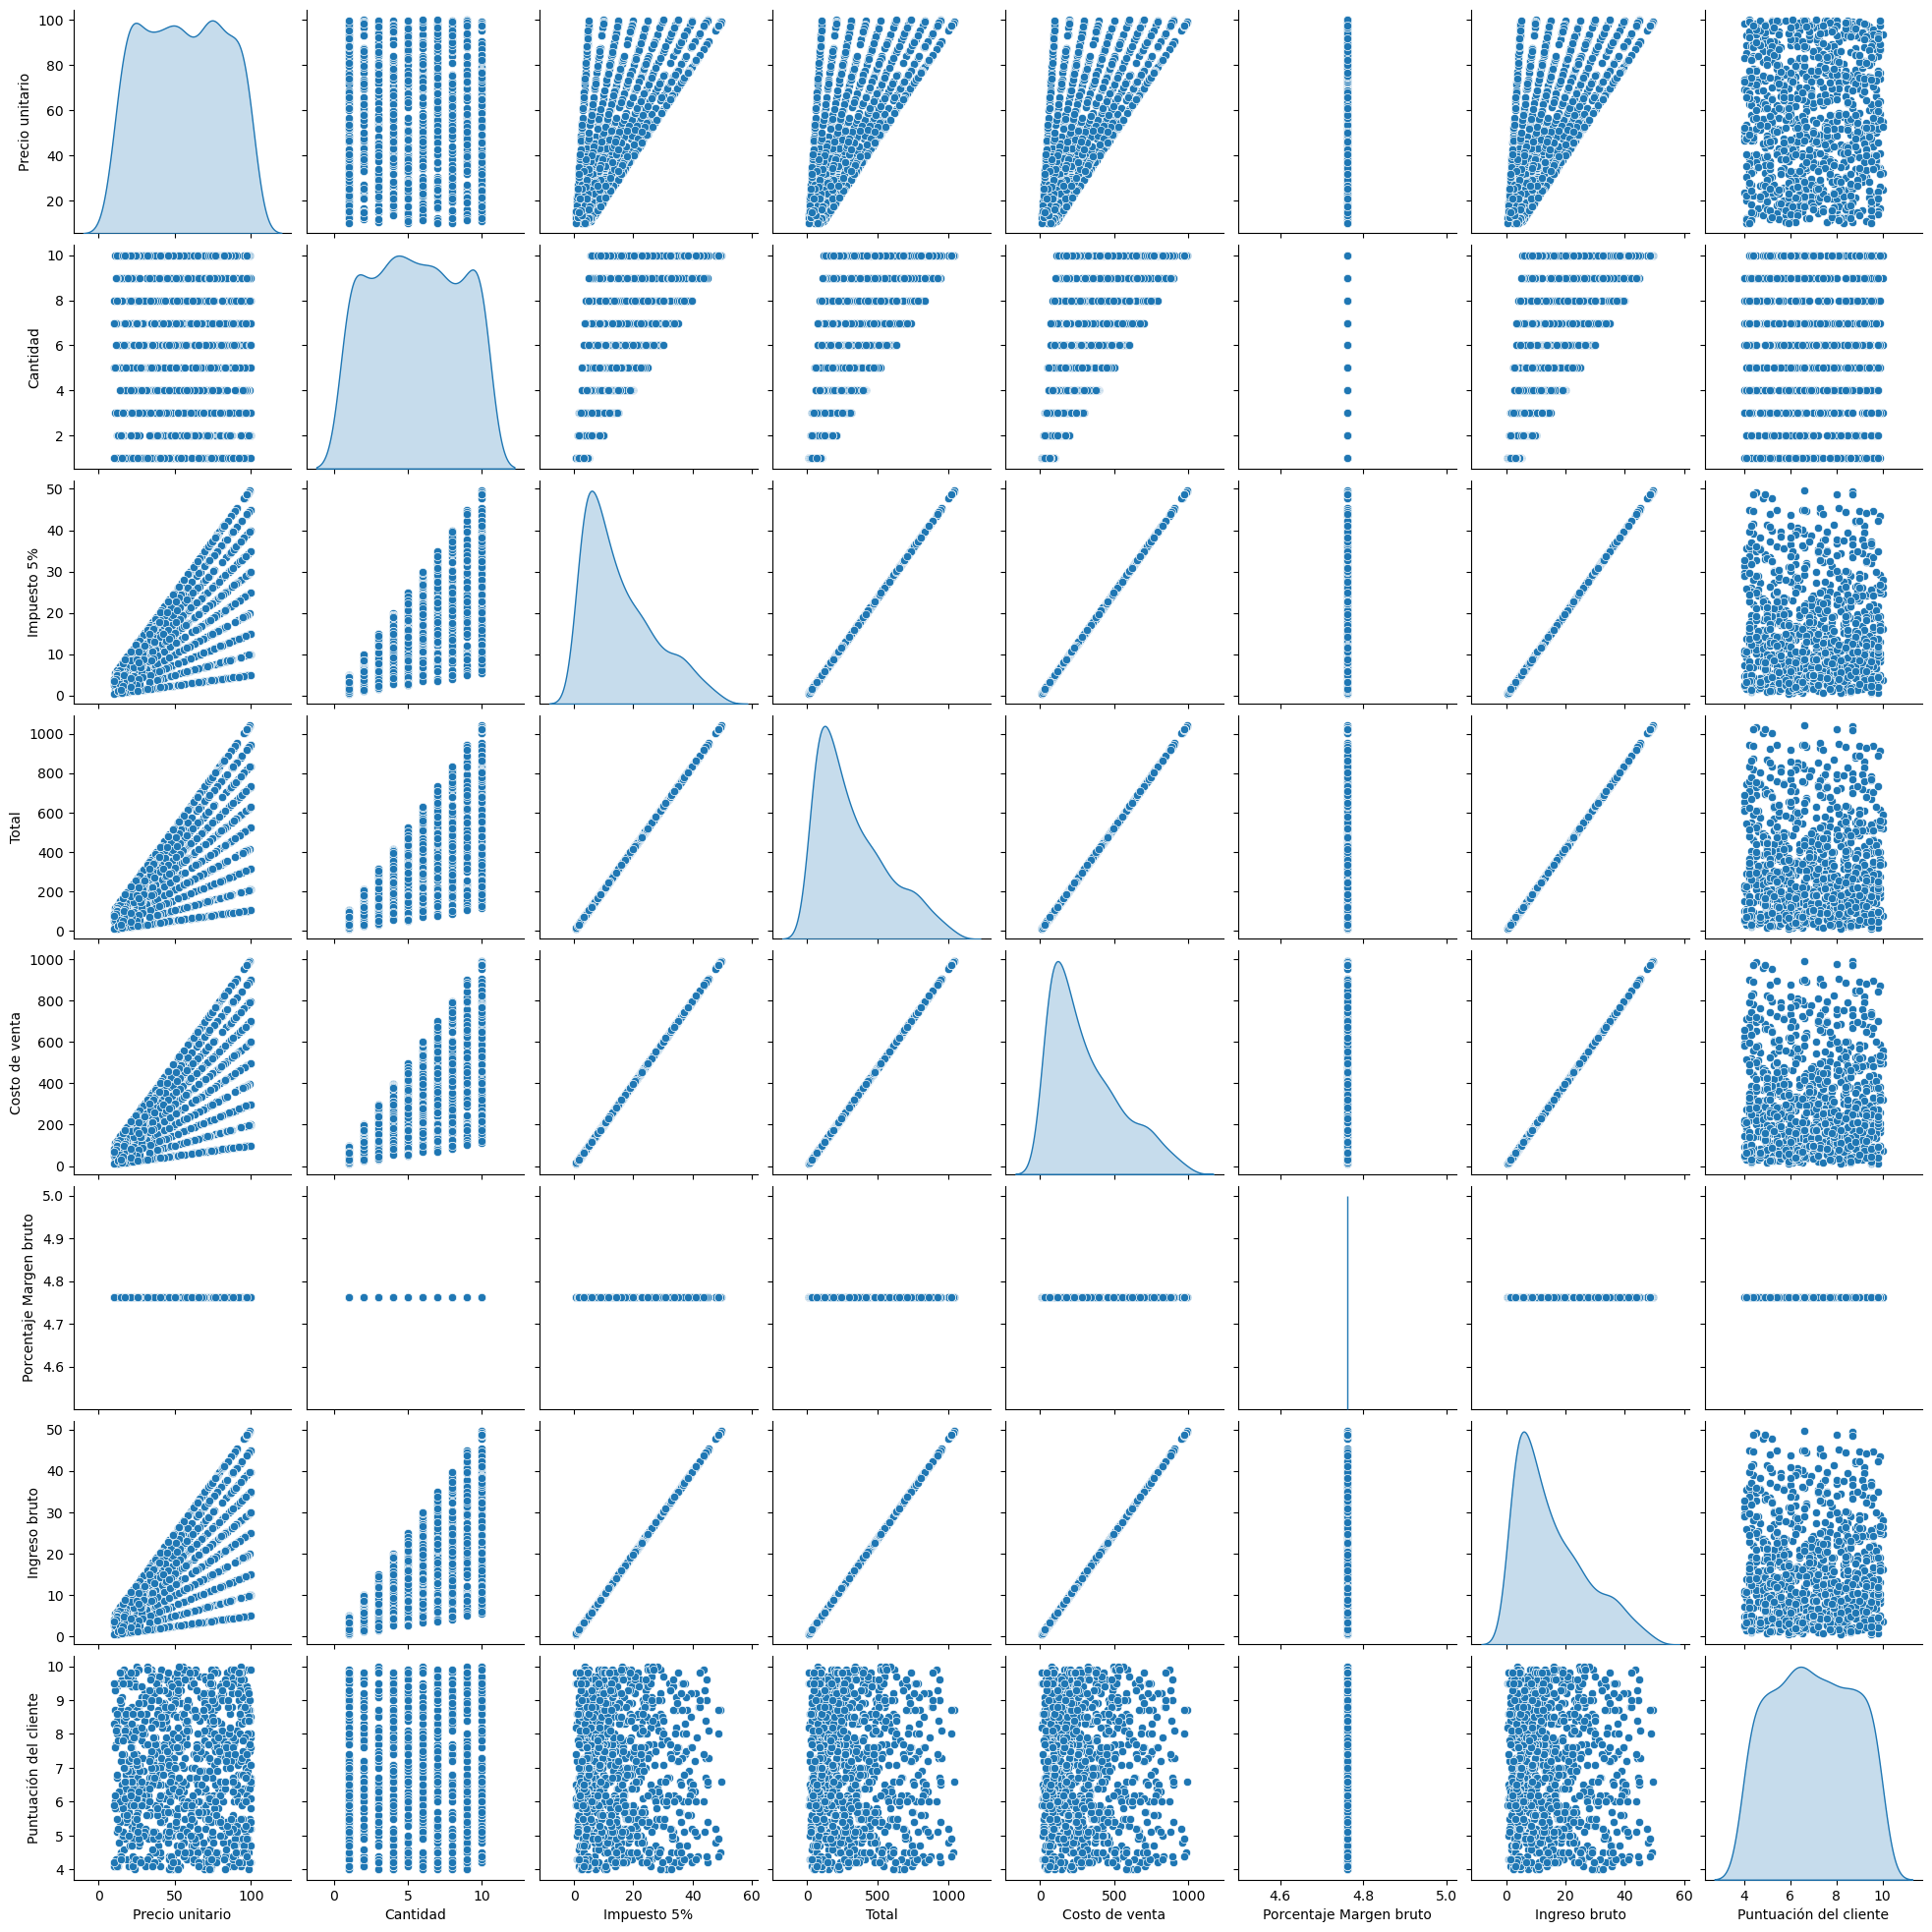

In [16]:
#graficamos todo con pairplot
sns.pairplot(dataset,diag_kind='kde',)
plt.show()

# Preguntas de negocio

**¿Qué sucursal obtuvo la mayor facturación total? (Suma columna total)**

In [17]:
dataset[["Ciudad", "Total"]].groupby("Ciudad").agg(["sum","mean"])

Total            
                   sum        mean
Ciudad                            
Mandalay   106197.6720  319.872506
Naypyitaw  110568.7065  337.099715
Yangon     106200.3705  312.354031

La sucursal Naypyitaw es la que presenta el mayor monto total en el trimestre y también el promedio de venta.

**¿Cuáles fueron los totales de ventas por mes?**

In [29]:
dataset.groupby("Mes")["Total"].sum()

Mes
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

Hubo un descenso de las ventas de Marzo en relación a Enero. Tanto en la suma de ventas, como en la cantidad de transacciones.

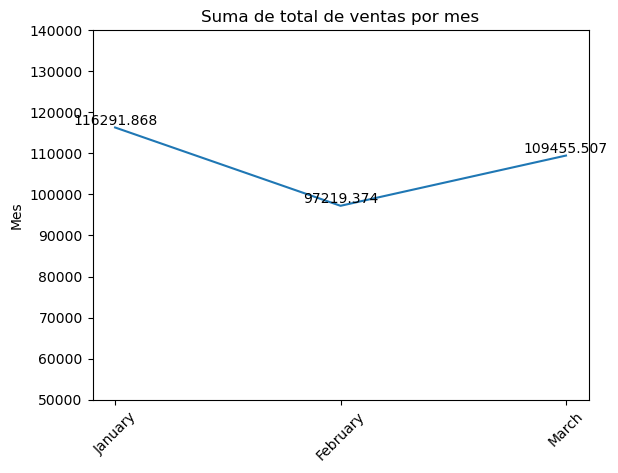

In [35]:
ventas_mes=dataset.groupby("Mes")["Total"].sum()
ventas_mes = ventas_mes.sort_index()
plt.plot(ventas_mes.index, ventas_mes.values)
plt.title("Suma de total de ventas por mes")                      #TITULO
plt.ylabel("Mes",fontsize=10)        #ETIQUETA X
#plt.xlabel("Suma Total",fontsize=10)          #ETIQUETA Y
plt.xticks(ticks=[1,2,3],labels=['January', 'February', 'March'],rotation=45,fontsize=10)   #inclinacion de las etiquetas de eje x
plt.ylim(50000,140000) #limite para el eje y.
#plt.xlim(1,3)
#Agregar las etiquetas con los valores de ventas
for x, y in zip(ventas_mes.index, ventas_mes.values):
   plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

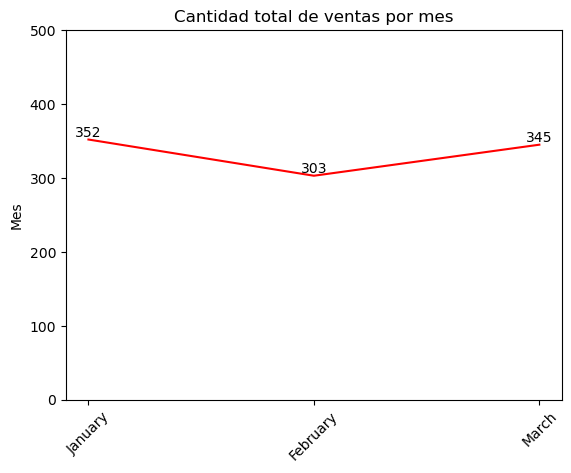

In [36]:
qventas_mes=dataset.groupby("Mes")["Total"].count()
qventas_mes = qventas_mes.sort_index()
plt.plot(qventas_mes.index, qventas_mes.values,color="red")
plt.title("Cantidad total de ventas por mes")                      #TITULO
plt.ylabel("Mes",fontsize=10)        #ETIQUETA X
#plt.xlabel("Suma Total",fontsize=10)          #ETIQUETA Y
plt.xticks(ticks=[1,2,3],labels=['January', 'February', 'March'],rotation=45,fontsize=10)   #inclinacion de las etiquetas de eje x
plt.ylim(0,500) #limite para el eje y.
#plt.xlim(1,3)
#Agregar las etiquetas con los valores de ventas
for x, y in zip(qventas_mes.index, qventas_mes.values):
   plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

In [47]:
dataset[["Tipo de Cliente", "Ciudad", "Puntuación del cliente"]].groupby(["Ciudad","Tipo de Cliente"]).mean()

Puntuación del cliente
Ciudad    Tipo de Cliente                        
Mandalay  Member                         6.770303
          Normal                         6.865269
Naypyitaw Member                         7.048521
          Normal                         7.098742
Yangon    Member                         6.998802
          Normal                         7.054335

En promedio los clientes "normal" de Naypyitaw fueron los que puntuaron con valores más altos las compras. 

**¿Cuál fue la puntuación promedio según el tipo de cliente y forma de pago?**

In [80]:
dataset[["Tipo de Cliente", "Pago", "Puntuación del cliente"]].groupby(["Tipo de Cliente","Pago"]).mean()

Puntuación del cliente
Tipo de Cliente Pago                               
Member          Cash                       6.823810
                Credit card                7.080233
                Ewallet                    6.912422
Normal          Cash                       7.109659
                Credit card                6.907914
                Ewallet                    6.978804

Entre los clientes "normal" el promedio más alto de calificación fue con el pago en efectivo, mientras que para el cliente "member" la tarjeta de crédito. 

# CONCLUSIONES

**¿Qué tendencia se aprecia en las ventas mes a mes?**

Hubo un descenso de las ventas de Marzo en relación a Enero. Tanto en la suma de ventas, como en la cantidad de transacciones.

**¿Cuál es la sucursal que más facturó en el trimestre?**

La sucursal Naypyitaw es la que presenta el mayor monto total en el trimestre y también el promedio de venta.

**¿Qué promedio de puntaje nos dió cada tipo de cliente?**

En promedio los clientes "normal" de Naypyitaw fueron los que puntuaron con valores más altos las compras. 

**¿Qué sucursal tiene la mayor puntuación promedio?**

La sucursal de Naypyitaw tuvo el mejor puntaje promedio. 

**¿Cuál fue la puntuación promedio según el tipo de cliente y forma de pago?**

Entre los clientes "normal" el promedio más alto de calificación fue con el pago en efectivo, mientras que para el cliente "member" la tarjeta de crédito. 


# Fuente Dataset

A P. (s.f.). Supermarket sales. Kaggle. https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales